In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
app_train_df = pd.read_csv('home-credit-default-risk\\application_train.csv')

In [3]:
app_train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
app_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train_df.duplicated().sum()

0

In [6]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(app_train_df)

In [7]:
null_df

,Feature,Percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
62,EXT_SOURCE_2,0.214626
63,AMT_GOODS_PRICE,0.090403
64,AMT_ANNUITY,0.003902
65,CNT_FAM_MEMBERS,0.000650


<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

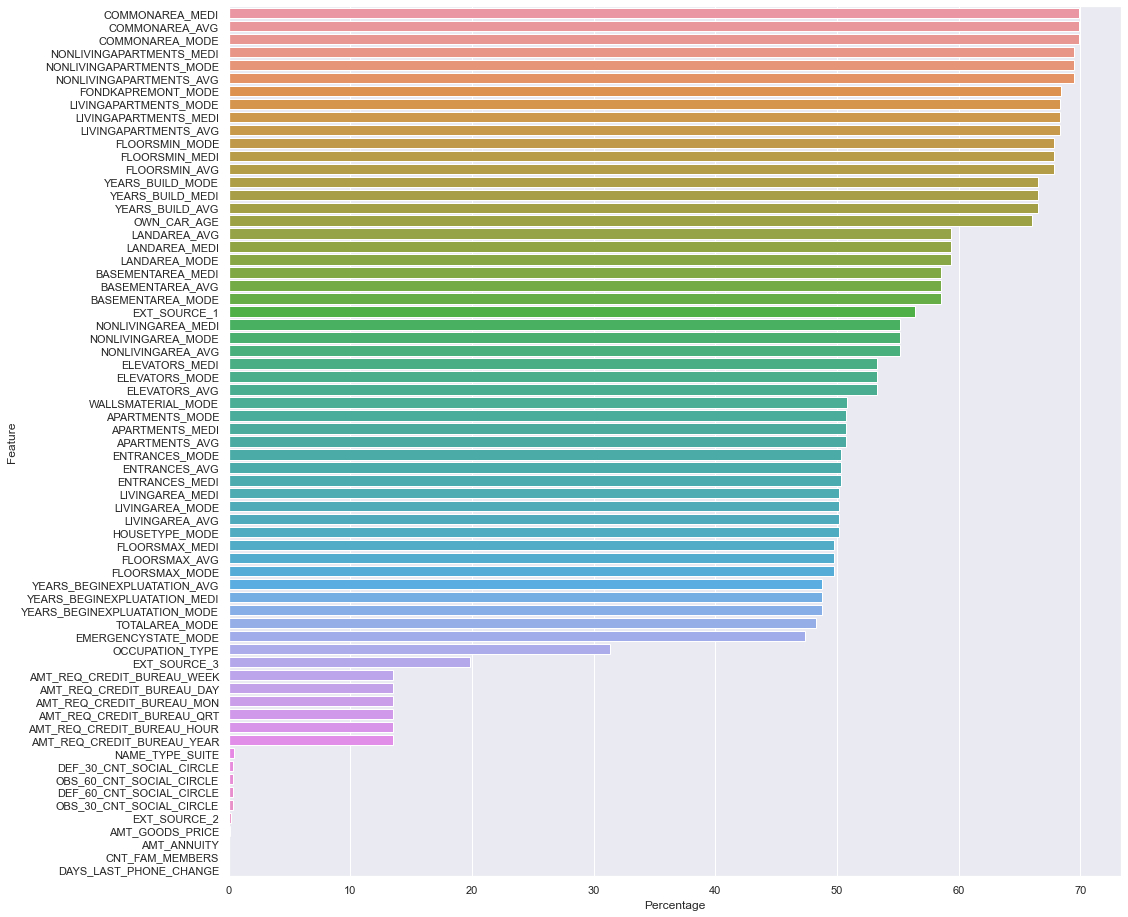

In [8]:
plt.figure(figsize=(16,16))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

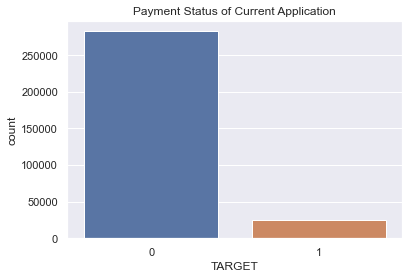

In [9]:
#Checking Data Imbalance
plt.title("Payment Status of Current Application")
sns.countplot(app_train_df['TARGET'])
plt.show()

In [10]:
print("No. of defaulters: ", app_train_df[app_train_df['TARGET'] == 1].shape[0])
print("No. of non-defaulters: ", app_train_df[app_train_df['TARGET'] == 0].shape[0])

No. of defaulters:  24825
No. of non-defaulters:  282686


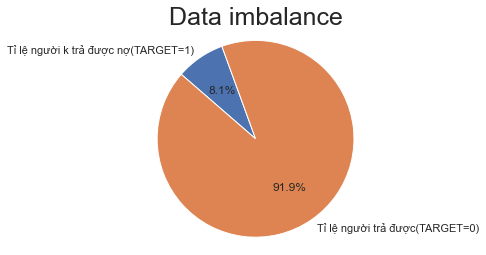

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie([app_train_df[app_train_df['TARGET'] == 1].shape[0], app_train_df[app_train_df['TARGET'] == 0].shape[0]],
labels=['Tỉ lệ người k trả được nợ(TARGET=1)','Tỉ lệ người trả được(TARGET=0)'], autopct='%1.1f%%', startangle=110)
ax1.axis('equal')
plt.title('Data imbalance',fontsize=25)
plt.show()

In [40]:
import phik

categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                                'LIVE_CITY_NOT_WORK_CITY']+ ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + app_train_df.dtypes[app_train_df.dtypes == 'object'].index.tolist()

phik_matrix = app_train_df[categorical_columns].phik_matrix()
phik_matrix

interval columns not set, guessing: ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
TARGET,1.000000,0.000000,0.072087,0.044678,0.000000,0.037258,0.000000,0.035450,0.036699,0.008207,...,0.046954,0.056043,0.051107,0.102846,0.005163,0.089164,0.018009,0.007787,0.027739,0.018600
FLAG_MOBIL,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007356,0.000000,0.000000,NaN,0.000000,0.012408,NaN,0.000000,0.000000,0.000000
FLAG_EMP_PHONE,0.072087,0.000000,1.000000,0.359031,0.019779,0.025162,0.098014,0.022789,0.024047,0.057399,...,0.114027,0.348342,0.153435,0.003758,0.026476,1.000000,0.011698,0.010477,0.010839,0.004357
FLAG_WORK_PHONE,0.044678,0.000000,0.359031,1.000000,0.033623,0.444297,0.017845,0.007271,0.008711,0.101028,...,0.014523,0.096055,0.037471,0.034673,0.028002,0.307648,0.016835,0.003307,0.022578,0.007882
FLAG_CONT_MOBILE,0.000000,0.000000,0.019779,0.033623,1.000000,0.009274,0.007648,0.010843,0.010489,0.000000,...,0.017741,0.010344,0.000000,0.026862,0.017203,0.026142,0.013665,0.000000,0.000000,0.000000
FLAG_PHONE,0.037258,0.000000,0.025162,0.444297,0.009274,1.000000,0.022822,0.059214,0.055883,0.001524,...,0.025708,0.041694,0.051404,0.064185,0.014519,0.055749,0.033626,0.013751,0.040895,0.030869
FLAG_EMAIL,0.000000,0.000000,0.098014,0.017845,0.007648,0.022822,1.000000,0.039739,0.037731,0.029036,...,0.073338,0.045771,0.021435,0.098796,0.005542,0.098638,0.014421,0.004328,0.021908,0.012931
REGION_RATING_CLIENT,0.035450,0.000000,0.022789,0.007271,0.010843,0.059214,0.039739,1.000000,0.998765,0.032304,...,0.095420,0.055506,0.205422,0.124169,0.026476,0.190183,0.042036,0.084859,0.155346,0.022927
REGION_RATING_CLIENT_W_CITY,0.036699,0.000000,0.024047,0.008711,0.010489,0.055883,0.037731,0.998765,1.000000,0.030482,...,0.094973,0.057623,0.204883,0.124536,0.025151,0.189217,0.045503,0.070509,0.144625,0.020711
REG_REGION_NOT_LIVE_REGION,0.008207,0.000000,0.057399,0.101028,0.000000,0.001524,0.029036,0.032304,0.030482,1.000000,...,0.038369,0.052314,0.129295,0.040761,0.002798,0.115167,0.000000,0.002047,0.006241,0.000000


<AxesSubplot:>

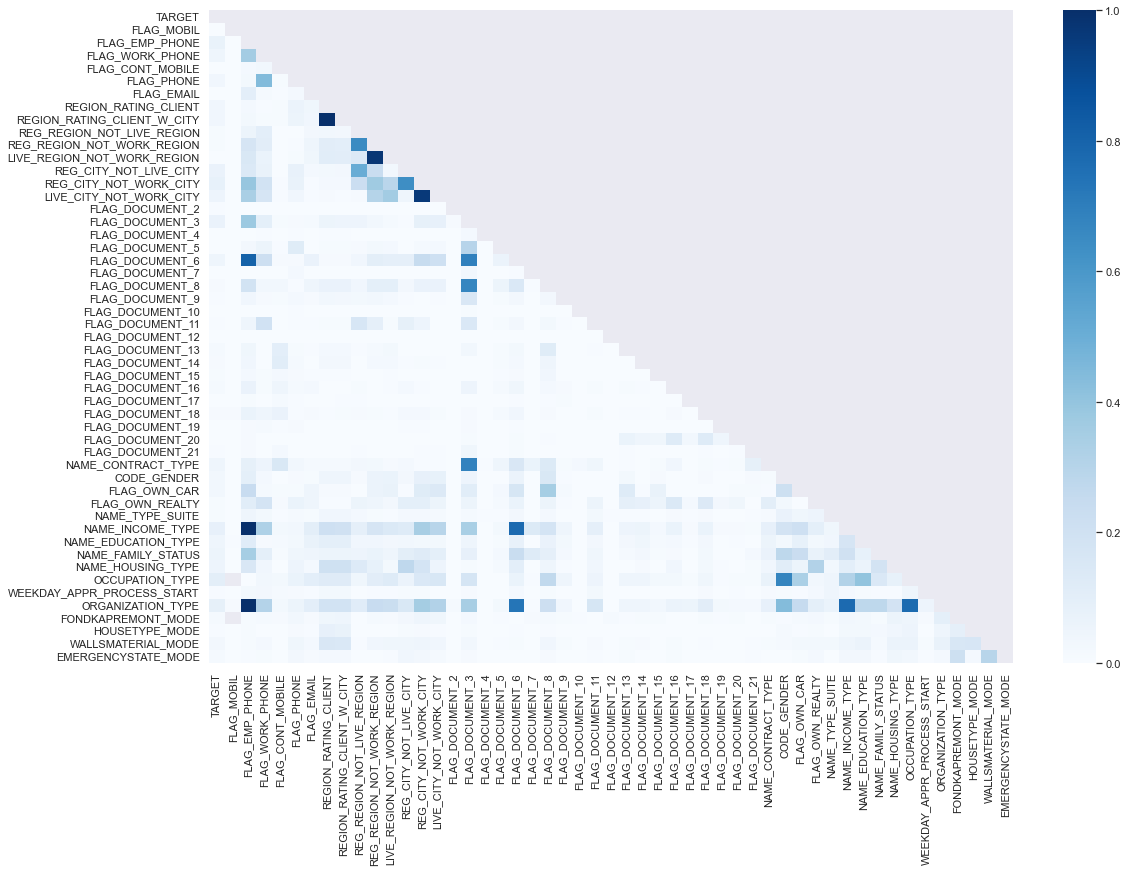

In [39]:
mask = np.zeros_like(phik_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,12))
sns.heatmap(phik_matrix,mask= mask, cmap= 'Blues')

In [44]:
phik_matrix.iloc[:, 0].sort_values(ascending= False)

TARGET                         1.000000
OCCUPATION_TYPE                0.102846
ORGANIZATION_TYPE              0.089164
NAME_INCOME_TYPE               0.084831
REG_CITY_NOT_WORK_CITY         0.079946
FLAG_EMP_PHONE                 0.072087
REG_CITY_NOT_LIVE_CITY         0.069588
FLAG_DOCUMENT_3                0.069525
NAME_FAMILY_STATUS             0.056043
NAME_HOUSING_TYPE              0.051107
LIVE_CITY_NOT_WORK_CITY        0.050956
NAME_CONTRACT_TYPE             0.048399
NAME_EDUCATION_TYPE            0.046954
FLAG_DOCUMENT_6                0.044791
FLAG_WORK_PHONE                0.044678
FLAG_PHONE                     0.037258
REGION_RATING_CLIENT_W_CITY    0.036699
REGION_RATING_CLIENT           0.035450
FLAG_OWN_CAR                   0.034179
CODE_GENDER                    0.032921
WALLSMATERIAL_MODE             0.027739
EMERGENCYSTATE_MODE            0.018600
FONDKAPREMONT_MODE             0.018009
FLAG_DOCUMENT_16               0.017927
FLAG_DOCUMENT_13               0.017812


In [ ]:
"""Some of the highly correlated Category pairs are:

    REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT - This is understandable as they would more or less tell a similar story.
    LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
    NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE

We can also see some correlation between the Organization type and the income type of a client. Similarly we see a correlation between the Occupation Type and the Organization Type too.
We find that the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY are some of the highest correlated categories with the TARGET variable. These maybe important in the classification task, and would need further EDA"""

In [56]:
numeric_col = [col for col in app_train_df.columns if col not in categorical_columns]
numeric_col_corr = app_train_df[numeric_col].phik_matrix()

TypeError: unsupported operand type(s) for -: 'list' and 'set'

<AxesSubplot:>

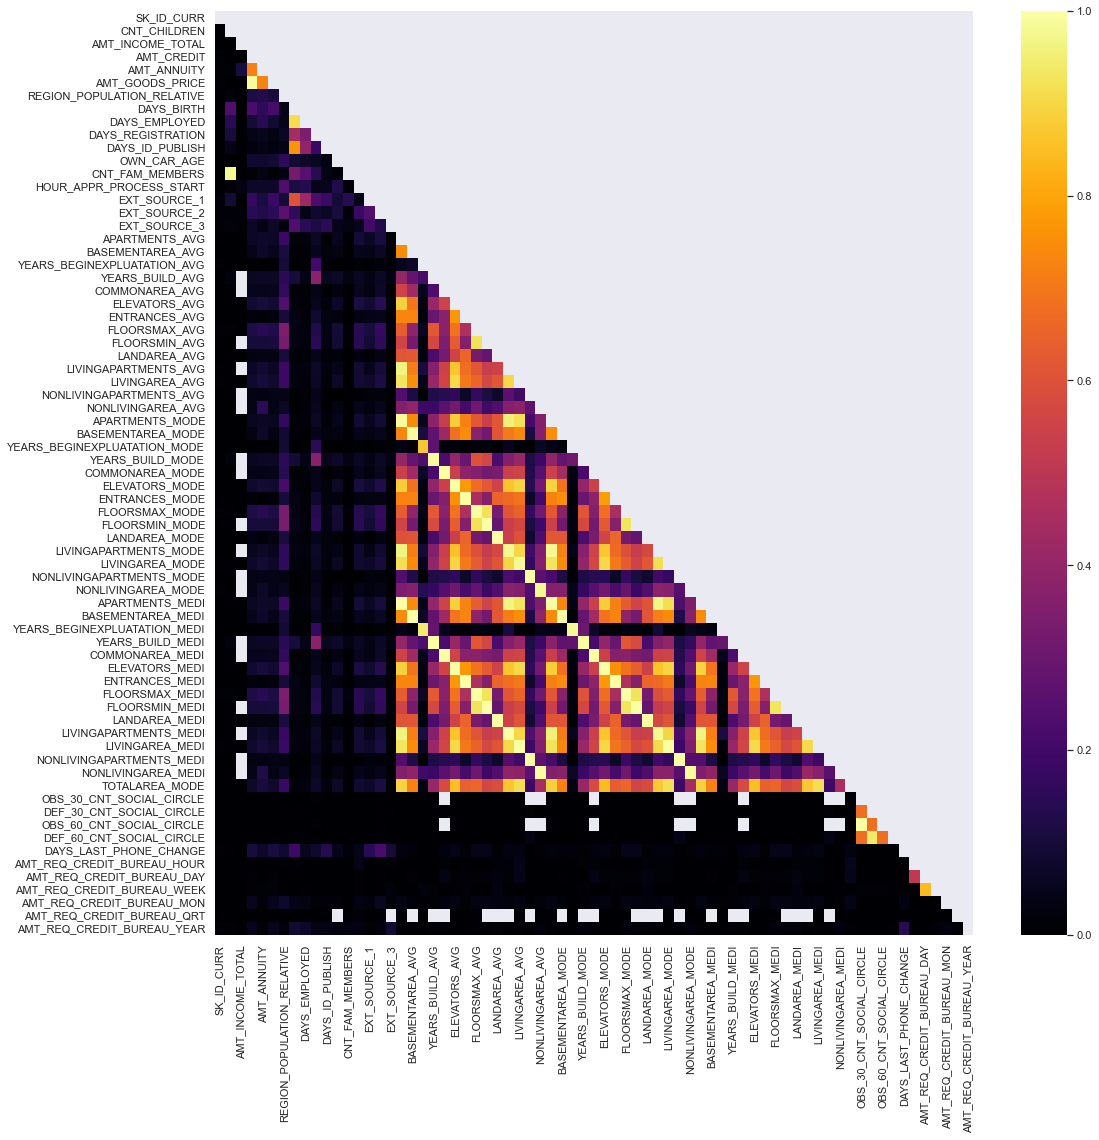

In [53]:
mask = np.zeros_like(numeric_col_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17,17))
sns.heatmap(numeric_col_corr, mask= mask, cmap= 'inferno')

In [54]:
"""
high correlation between AMT_GOODS_PRICE and AMT_CREDIT, between DAYS_EMPLOYED and DAYS_BIRTH.
"""

SK_ID_CURR                    1.000000
FLOORSMAX_MODE                0.019019
FLOORSMAX_MEDI                0.016544
AMT_REQ_CREDIT_BUREAU_YEAR    0.016008
EXT_SOURCE_1                  0.015867
                                ...   
ELEVATORS_MODE                0.000000
FLOORSMIN_MODE                0.000000
LANDAREA_MODE                 0.000000
LIVINGAPARTMENTS_MODE         0.000000
COMMONAREA_MODE               0.000000
Name: SK_ID_CURR, Length: 71, dtype: float64

## EDA
## Documents Submitted

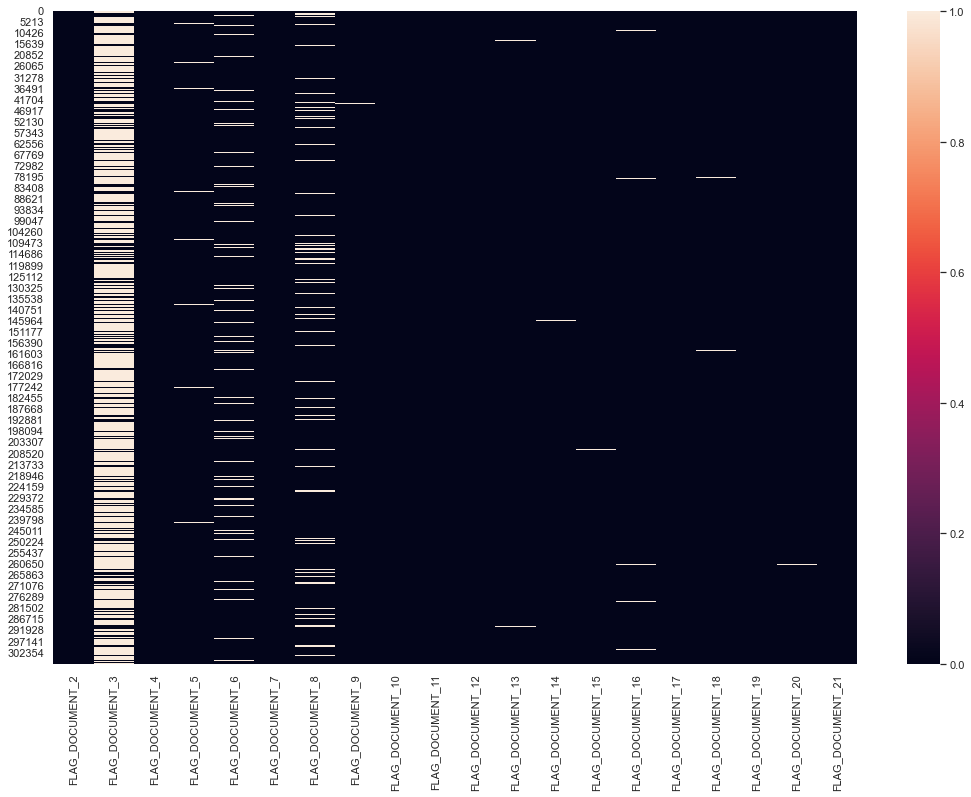

In [57]:
starting_idx = app_train_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = app_train_df.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(app_train_df.iloc[:,starting_idx:ending_idx])
plt.show()
## DOCUMENT_3,có vẻ được cung cấp trong hầu hết các khoản vay
## coi như tất cả các các DOCUMENT khác không quan trọng

[Text(0.5, 1.0, 'Defaulter')]

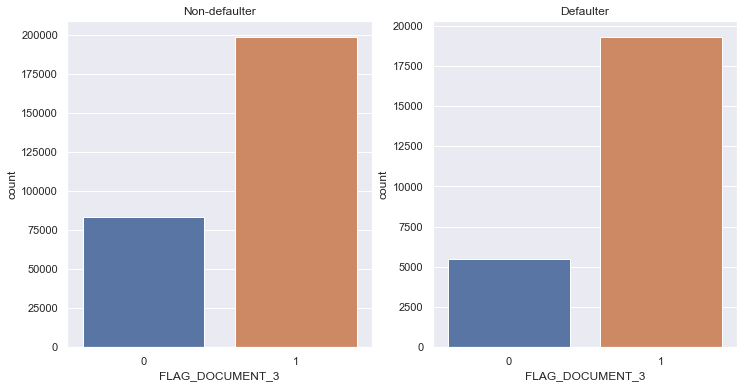

In [70]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]["FLAG_DOCUMENT_3"], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]["FLAG_DOCUMENT_3"], ax= ax[1]).set(title = "Defaulter")

## Asset Details

In [69]:
app_train_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


[Text(0.5, 1.0, 'Defaulter')]

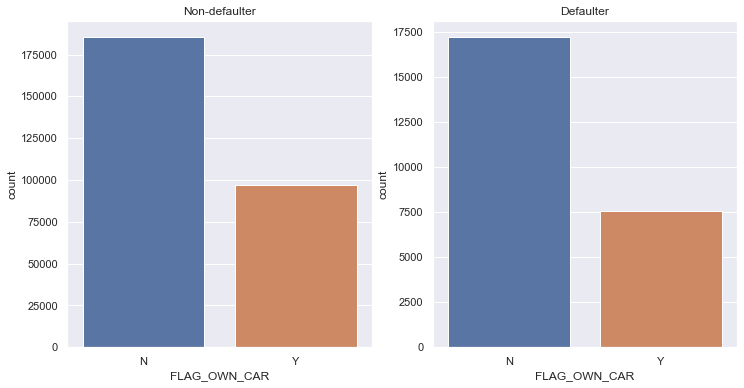

In [79]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['FLAG_OWN_CAR'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['FLAG_OWN_CAR'], ax= ax[1]).set(title = "Defaulter")

In [74]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)

In [75]:
defaulter_percentage_count_per_cat(app_train_df, 'FLAG_OWN_CAR')

,Categories,Percentage_Of_Default
0,N,8.500227
1,Y,7.243730


[Text(0.5, 1.0, 'Defaulter')]

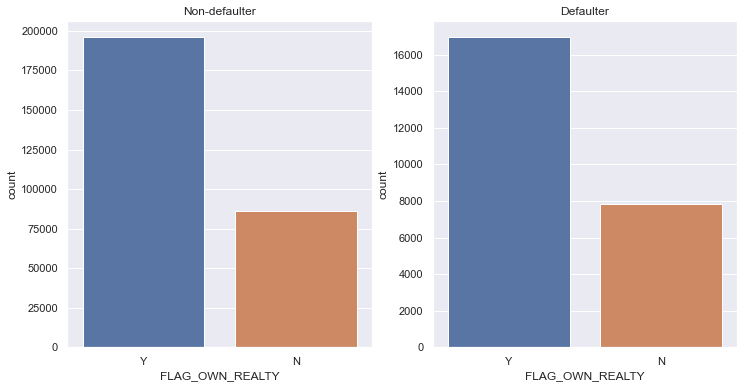

In [77]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['FLAG_OWN_REALTY'], order=['Y','N'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['FLAG_OWN_REALTY'], order=['Y','N'], ax= ax[1]).set(title = "Defaulter")

In [80]:
defaulter_percentage_count_per_cat(app_train_df, 'FLAG_OWN_REALTY')

,Categories,Percentage_Of_Default
1,N,8.324929
0,Y,7.961577


[Text(0.5, 1.0, 'Defaulter')]

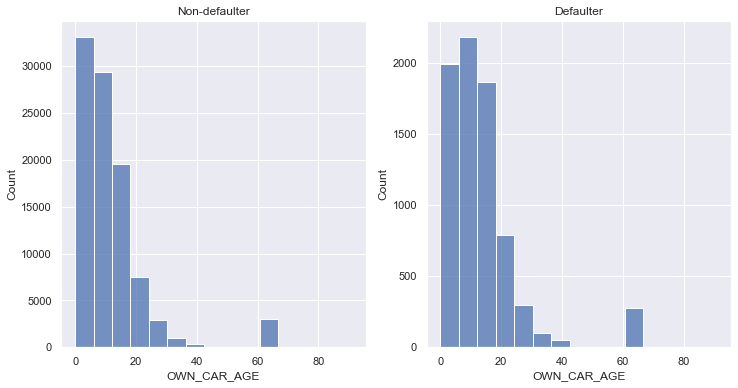

In [85]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(app_train_df[app_train_df["TARGET"] == 0]['OWN_CAR_AGE'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.histplot(app_train_df[app_train_df["TARGET"] == 1]['OWN_CAR_AGE'], bins= 15, ax= ax[1]).set(title = "Defaulter")

In [ ]:
"""
Hầu hết khách hàng sở hữu tài sản
Hầu hết khách hàng không sở hữu xe"""

## Family Related Info

In [86]:
app_train_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

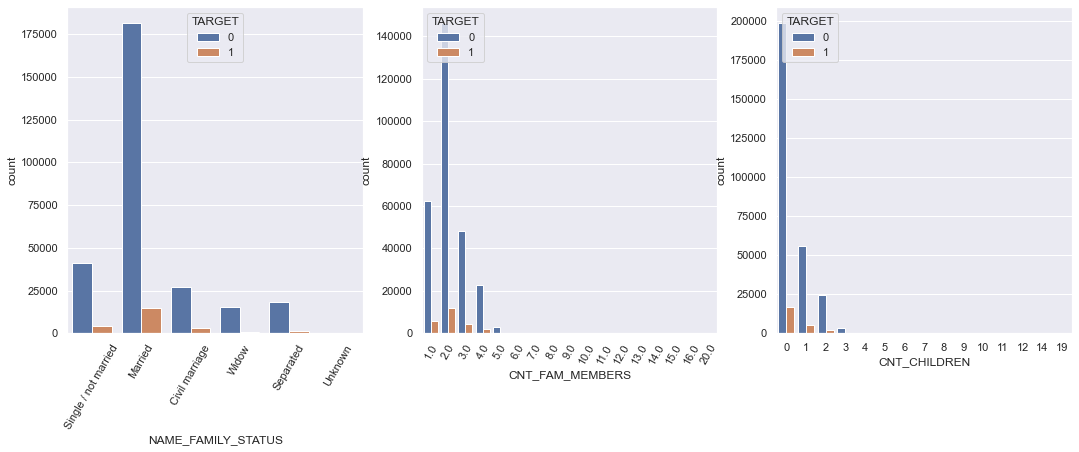

In [101]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(app_train_df['NAME_FAMILY_STATUS'], hue=app_train_df['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['CNT_FAM_MEMBERS'], hue=app_train_df['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['CNT_CHILDREN'], hue=app_train_df['TARGET'], ax= ax[2])

In [ ]:
""" Lấy nhận xét cũ của Minh"""

In [102]:
defaulter_percentage_count_per_cat(app_train_df, 'NAME_FAMILY_STATUS')

,Categories,Percentage_Of_Default
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217
5,Unknown,0.000000


In [112]:
defaulter_percentage_count_per_cat(app_train_df, 'CNT_FAM_MEMBERS')

ZeroDivisionError: division by zero

In [104]:
defaulter_percentage_count_per_cat(app_train_df, 'CNT_CHILDREN')

,Categories,Percentage_Of_Default
9,9,100.000000
10,11,100.000000
7,6,28.571429
4,4,12.820513
3,3,9.631423
1,1,8.923575
2,2,8.721821
6,5,8.333333
0,0,7.711809
5,7,0.000000


## Education and Occupation Info

In [113]:
app_train_df[['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NAME_INCOME_TYPE     307511 non-null  object
 1   NAME_EDUCATION_TYPE  307511 non-null  object
 2   OCCUPATION_TYPE      211120 non-null  object
dtypes: object(3)
memory usage: 7.0+ MB


[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Medicine staff'),
 Text(10, 0, 'Security staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

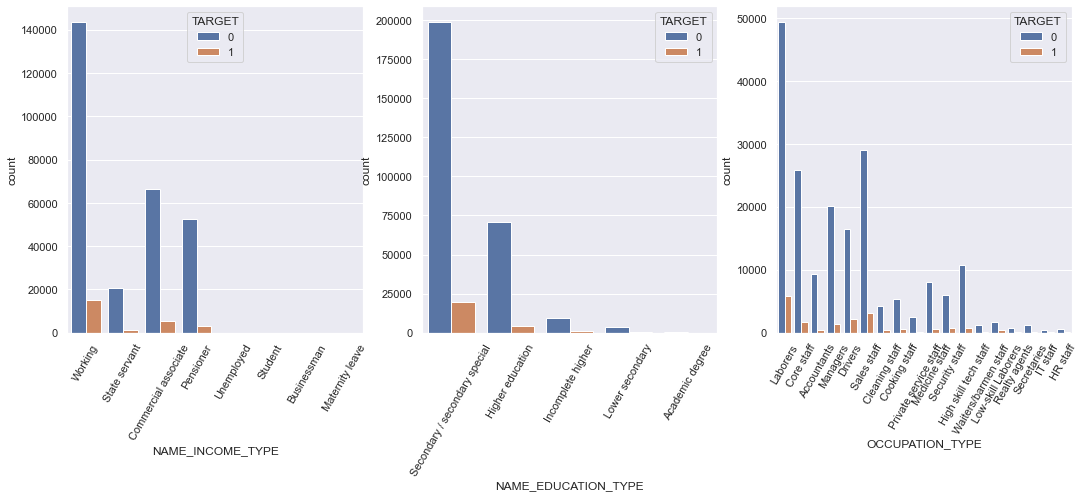

In [115]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(app_train_df['NAME_INCOME_TYPE'], hue=app_train_df['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['NAME_EDUCATION_TYPE'], hue=app_train_df['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['OCCUPATION_TYPE'], hue=app_train_df['TARGET'], ax= ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation= 60)

## Personal

In [116]:
app_train_df[['CODE_GENDER', 'DAYS_BIRTH',"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CODE_GENDER  307511 non-null  object
 1   DAYS_BIRTH   307511 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

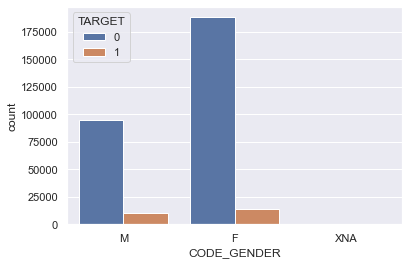

In [117]:
sns.countplot(app_train_df['CODE_GENDER'], hue=app_train_df['TARGET'])

In [118]:
app_train_df['DAYS_BIRTH'] = app_train_df['DAYS_BIRTH']/(-365)

[Text(0.5, 1.0, 'Defaulter')]

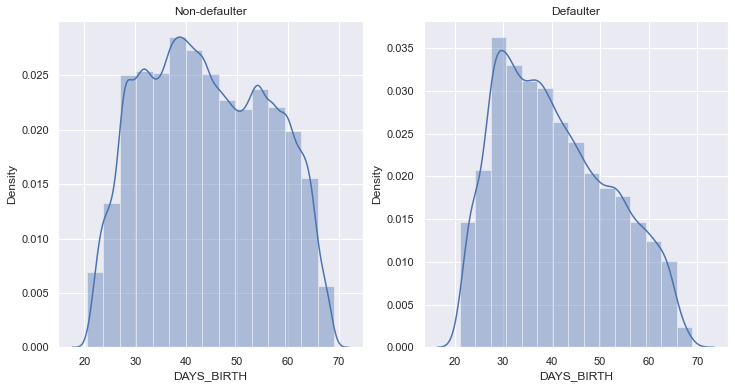

In [120]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['DAYS_BIRTH'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['DAYS_BIRTH'], bins= 15, ax= ax[1]).set(title = "Defaulter")

## Contact Related

<AxesSubplot:>

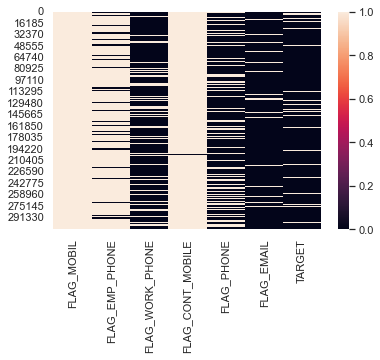

In [122]:
contact_df = app_train_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))

## Region Info

<AxesSubplot:>

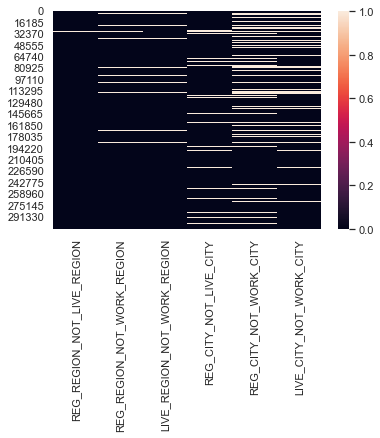

In [125]:
start_idx = app_train_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = app_train_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = app_train_df.iloc[:, start_idx:end_idx+1]
sns.heatmap(region_df)

## Social Circle Info

In [126]:
start_idx = app_train_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = app_train_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = app_train_df.iloc[:, start_idx:end_idx+1]

<AxesSubplot:>

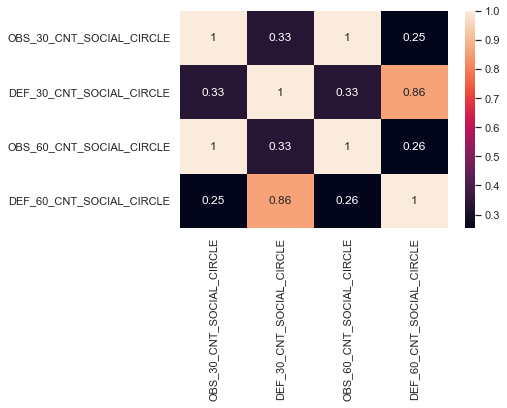

In [127]:
sns.heatmap(social_circle_df.corr(), annot=True)
#
#   DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
#   OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns


[Text(0.5, 1.0, 'Defaulter')]

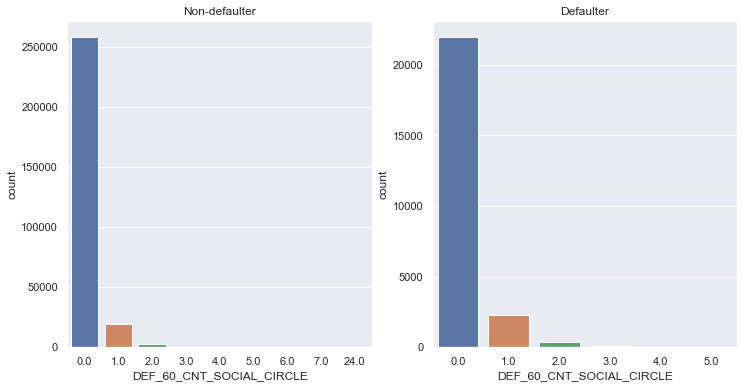

In [130]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

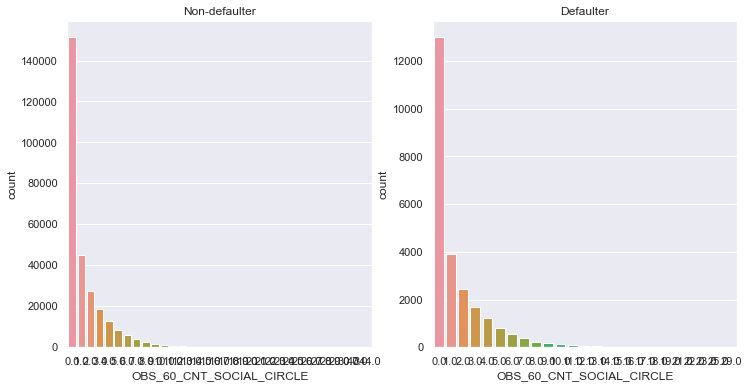

In [131]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(app_train_df[app_train_df["TARGET"] == 0]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(app_train_df[app_train_df["TARGET"] == 1]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

## Housing Information of Applicant

In [132]:
start_idx = app_train_df.columns.get_loc('APARTMENTS_AVG')
end_idx = app_train_df.columns.get_loc('EMERGENCYSTATE_MODE')

housing_df = app_train_df.iloc[:, start_idx:end_idx+1]
housing_df['TARGET'] = app_train_df["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = app_train_df["NAME_HOUSING_TYPE"]

In [133]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(housing_df)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

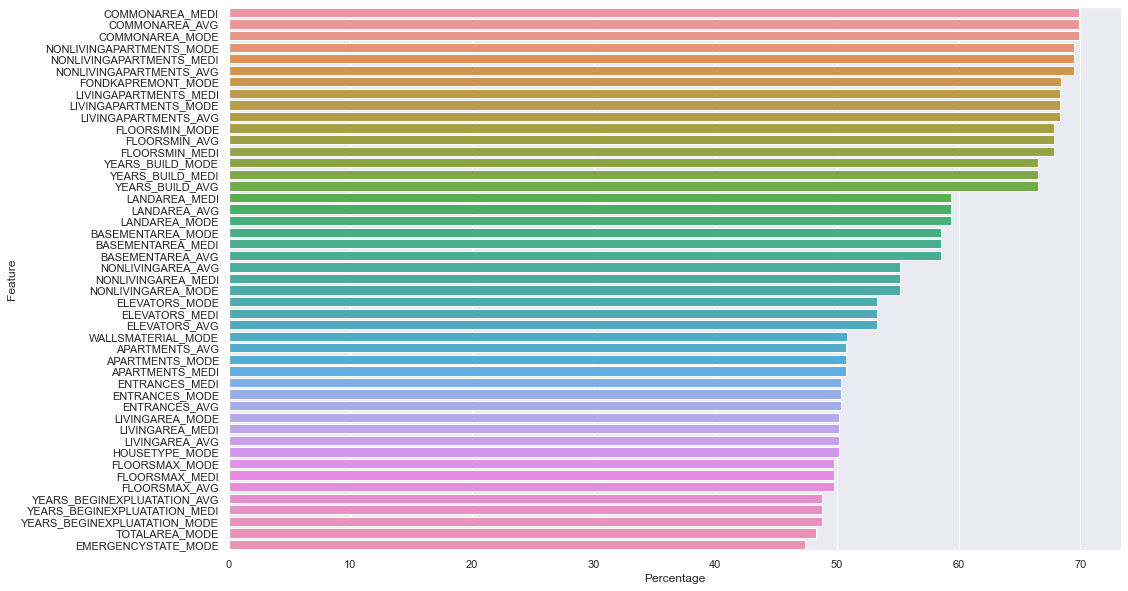

In [136]:
plt.figure(figsize=(16,10))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

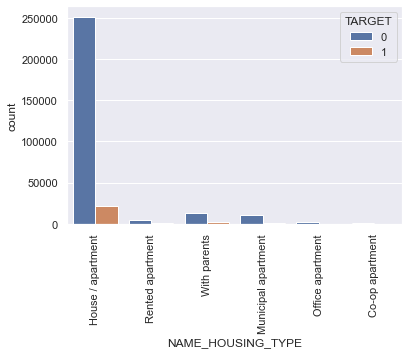

In [138]:
sns.countplot(app_train_df["NAME_HOUSING_TYPE"], hue=app_train_df["TARGET"])
plt.xticks(rotation=90)

In [139]:
defaulter_percentage_count_per_cat(app_train_df, "NAME_HOUSING_TYPE")

,Categories,Percentage_Of_Default
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


## Unknown Segment

[Text(0, 0, 'WEDNESDAY'),
 Text(1, 0, 'MONDAY'),
 Text(2, 0, 'THURSDAY'),
 Text(3, 0, 'SUNDAY'),
 Text(4, 0, 'SATURDAY'),
 Text(5, 0, 'FRIDAY'),
 Text(6, 0, 'TUESDAY')]

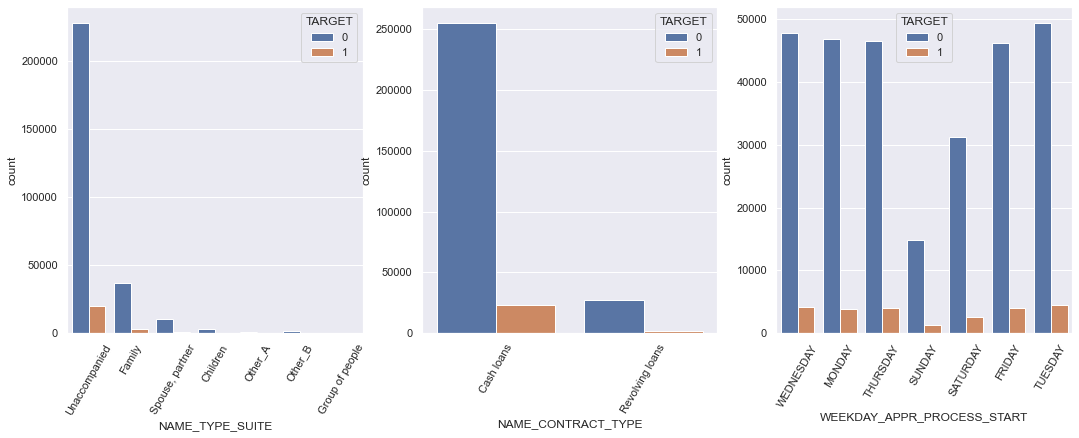

In [140]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(app_train_df['NAME_TYPE_SUITE'], hue=app_train_df['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['NAME_CONTRACT_TYPE'], hue=app_train_df['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(app_train_df['WEEKDAY_APPR_PROCESS_START'], hue=app_train_df['TARGET'], ax= ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation= 60)

## Income and Annuity

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

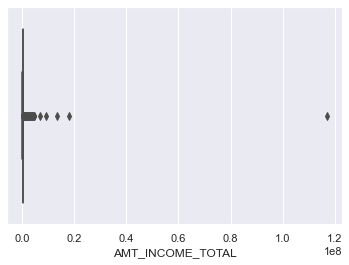

In [141]:
sns.boxplot(app_train_df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_ANNUITY'>

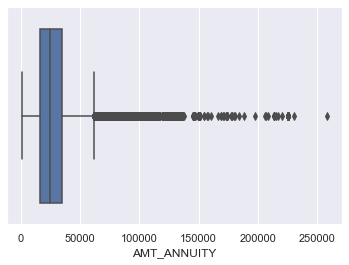

In [142]:
sns.boxplot(app_train_df['AMT_ANNUITY'])

In [143]:
app_train_df = app_train_df[app_train_df['AMT_ANNUITY'] < np.nanpercentile(app_train_df['AMT_ANNUITY'], 99)]
app_train_df = app_train_df[app_train_df['AMT_INCOME_TOTAL'] < np.nanpercentile(app_train_df['AMT_INCOME_TOTAL'], 99)]

[Text(0.5, 1.0, 'Defaulter')]

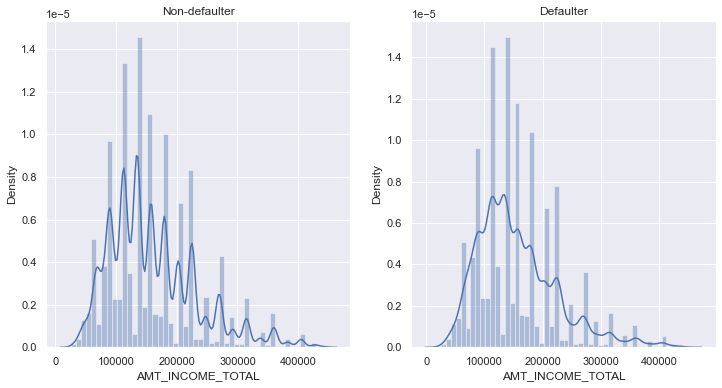

In [146]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax= ax[1]).set(title = "Defaulter")

[Text(0.5, 1.0, 'Defaulter')]

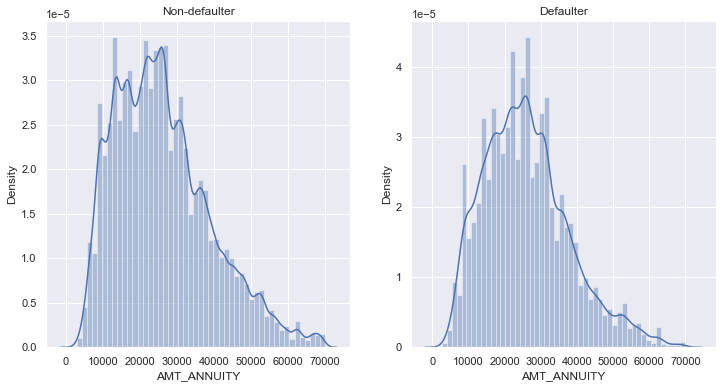

In [147]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_ANNUITY'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_ANNUITY'], ax= ax[1]).set(title = "Defaulter")

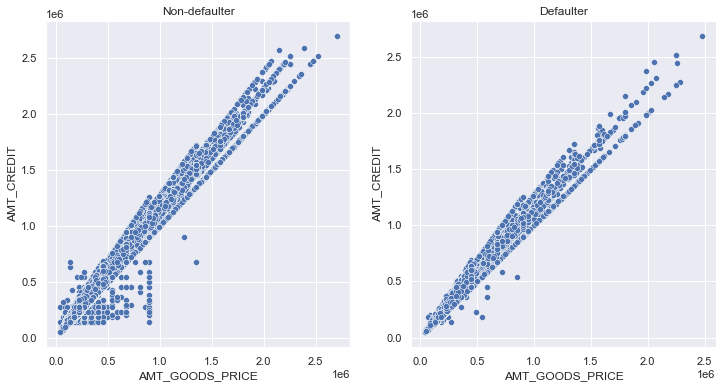

In [154]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.scatterplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_GOODS_PRICE'], app_train_df[app_train_df["TARGET"] == 0]['AMT_CREDIT'], ax= ax[0]).set(title = "Non-defaulter")

sns.scatterplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_GOODS_PRICE'], app_train_df[app_train_df["TARGET"] == 1]['AMT_CREDIT'], ax= ax[1]).set(title = "Defaulter")
plt.show()

## EXT_SOURCE

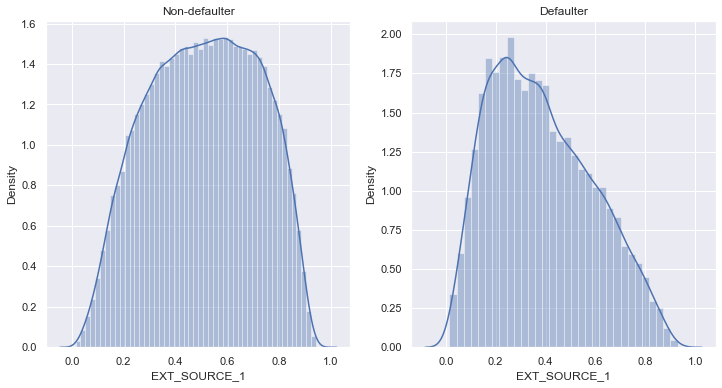

In [155]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['EXT_SOURCE_1'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['EXT_SOURCE_1'], ax= ax[1]).set(title = "Defaulter")
plt.show()

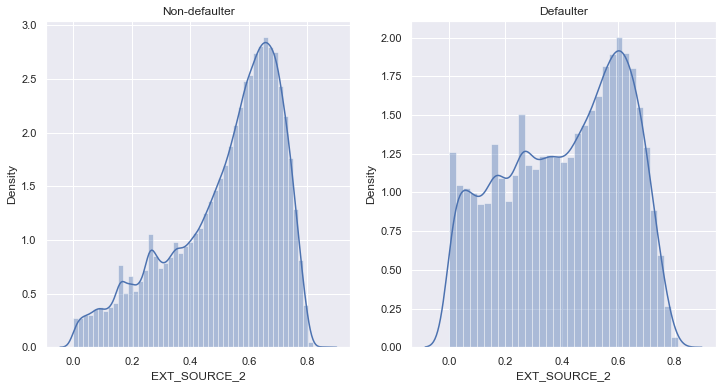

In [156]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['EXT_SOURCE_2'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['EXT_SOURCE_2'], ax= ax[1]).set(title = "Defaulter")
plt.show()

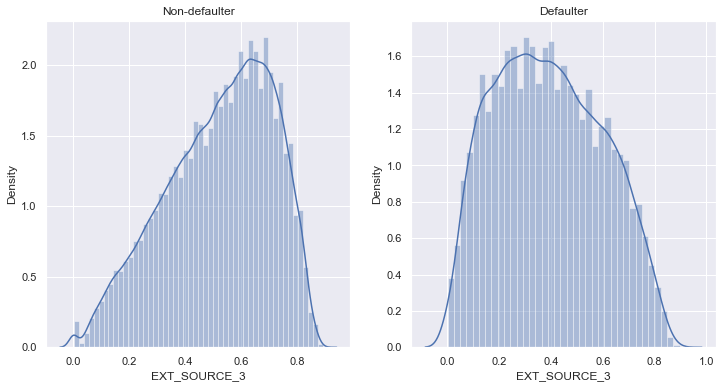

In [157]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['EXT_SOURCE_3'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['EXT_SOURCE_3'], ax= ax[1]).set(title = "Defaulter")
plt.show()